In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [2]:
df_dropped = pd.read_csv('../cleaned/output_ebay_dropped.csv')
df_dropped.head()

,price_pln,handheld,home_console,generation,seller_num_comments,seller_rating,condition_num,seller_score,collectible
0,327.48,0,1,6,1078,99.9,1,0.736873,0
1,286.38,0,1,6,280,100.0,1,0.692709,0
2,511.71,0,1,6,107,100.0,1,0.660797,0
3,532.18,0,1,6,108,100.0,1,0.661105,0
4,286.58,0,1,6,67,100.0,1,0.645358,0


In [3]:
df_encoded = pd.read_csv('../cleaned/output_ebay_encoded.csv')
df_encoded.head()

,condition,country,model,sale_date,title,price_pln,producer,model_group,handheld,home_console,generation,seller_name,seller_num_comments,seller_rating,region,condition_num,seller_score,collectible
0,537.638262,575.592766,435.897022,590.083431,552.881011,327.48,562.280699,435.897022,0,1,6,513.254053,1078,99.9,576.733207,1,0.736873,0
1,537.638262,575.592766,435.897022,590.083431,535.810807,286.38,562.280699,435.897022,0,1,6,614.563048,280,100.0,576.733207,1,0.692709,0
2,537.638262,575.592766,435.897022,590.083431,579.242835,511.71,562.280699,435.897022,0,1,6,488.247650,107,100.0,576.733207,1,0.660797,0
3,537.638262,575.592766,435.897022,590.083431,579.514216,532.18,562.280699,435.897022,0,1,6,546.338155,108,100.0,576.733207,1,0.661105,0
4,537.638262,575.592766,435.897022,590.083431,547.559575,286.58,562.280699,435.897022,0,1,6,547.559575,67,100.0,576.733207,1,0.645358,0


In [4]:
y_dropped = df_dropped['price_pln']
X_dropped = df_dropped.drop(columns=['price_pln'])
X_drop, X_test_dropped, y_drop, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)
X_dropped_train, X_dropped_cv, y_dropped_train, y_dropped_cv = train_test_split(X_drop, y_drop, test_size=0.25,train_size=0.75, random_state=42)

y_encoded = df_encoded['price_pln']
X_encoded = df_encoded.drop(columns=['price_pln'])
X_enc, X_test_encoded, y_enc, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_encoded_train, X_encoded_cv, y_encoded_train, y_encoded_cv = train_test_split(X_enc, y_enc, test_size=0.25, train_size=0.75, random_state=42)

In [5]:
tree_model_dropped = DecisionTreeRegressor(criterion ='squared_error', random_state = 0)
tree_model_dropped.fit(X_dropped_cv, y_dropped_cv)

DecisionTreeRegressor(random_state=0)

In [6]:
tree_model_dropped.get_depth()

43

In [7]:
tree_model_dropped.get_n_leaves()
#XDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD

np.int64(21680)

[ 0.00000000e+00 -2.01227923e-16  0.00000000e+00 ...  1.66687142e+04
  2.28769025e+04  8.45206921e+04]


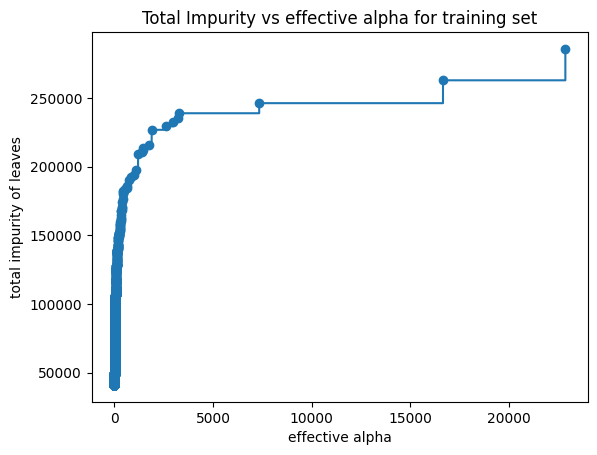

In [8]:
import matplotlib.pyplot as plt

path = tree_model_dropped.cost_complexity_pruning_path(X_dropped_cv, y_dropped_cv)
ccp_alphas_dropped, impurities_dropped = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas_dropped[:-1], impurities_dropped[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
print(ccp_alphas_dropped)

In [9]:
#Prunning
clfs_dropped = []
for ccp_alpha in ccp_alphas_dropped:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=abs(ccp_alpha), max_depth=5)
    clf.fit(X_dropped_train, y_dropped_train)
    clfs_dropped.append(clf)

rmse_values = [np.sqrt(mean_squared_error(y_test_dropped, alpha.predict(X_test_dropped))) for alpha in clfs_dropped]
best_alpha_idx = np.argmin(rmse_values)
best_model_dropped = clfs_dropped[best_alpha_idx]
best_alpha_dropped = ccp_alphas_dropped[best_alpha_idx]

print(best_alpha_dropped)
print(rmse_values[best_alpha_idx])

402.5780622229205
487.04993743494026


In [10]:
tree_model_encoded = DecisionTreeRegressor(criterion ='squared_error', random_state = 0)
tree_model_encoded.fit(X_encoded_cv, y_encoded_cv)

DecisionTreeRegressor(random_state=0)

In [11]:
tree_model_encoded.get_depth()

39

In [12]:
tree_model_encoded.get_n_leaves()

np.int64(21370)

[0.00000000e+00 0.00000000e+00 5.81189358e-19 ... 2.14739376e+04
 3.41040591e+04 1.92021949e+05]


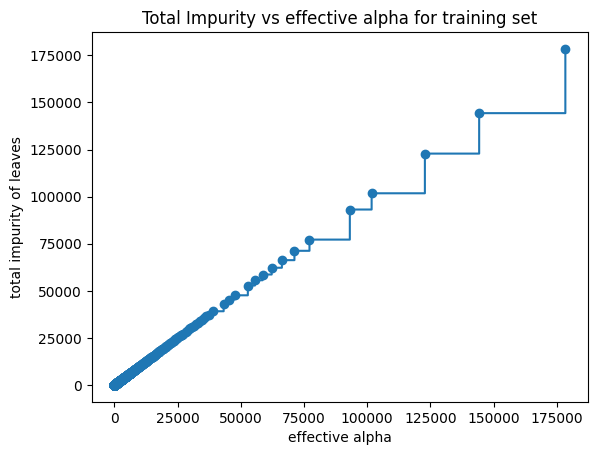

In [14]:
import matplotlib.pyplot as plt

path = tree_model_encoded.cost_complexity_pruning_path(X_encoded_cv, y_encoded_cv)
ccp_alphas_encoded, impurities_encoded = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(impurities_encoded[:-1], impurities_encoded[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
print(ccp_alphas_encoded)

In [15]:
#Prunning
clfs_encoded = []
for ccp_alpha in ccp_alphas_encoded:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=abs(ccp_alpha), max_depth=5)
    clf.fit(X_encoded_train, y_encoded_train)
    clfs_encoded.append(clf)

rmse_values = [np.sqrt(mean_squared_error(y_test_encoded, alpha.predict(X_test_encoded))) for alpha in clfs_encoded]
best_alpha_idx = np.argmin(rmse_values)
best_model = clfs_encoded[best_alpha_idx]
best_alpha_encoded = ccp_alphas_encoded[best_alpha_idx]

print(best_alpha_encoded)
print(rmse_values[best_alpha_idx])

0.0
259.4715486679485


In [19]:
final_tree_model_encoded = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha_encoded).fit(X_encoded_train, y_encoded_train)
final_tree_model_dropped = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha_dropped).fit(X_dropped_train, y_dropped_train)

In [23]:
final_tree_model_encoded.get_n_leaves()

np.int64(54773)

In [24]:
final_tree_model_dropped.get_n_leaves()

np.int64(38)

In [25]:
final_tree_model_encoded.get_depth()

44

In [26]:
final_tree_model_dropped.get_depth()

13

In [27]:
final_tree_model_dropped.score(X_test_dropped, y_test_dropped)

0.3628396939053806

In [28]:
final_tree_model_encoded.score(X_test_encoded, y_test_encoded)

0.9430571156893436